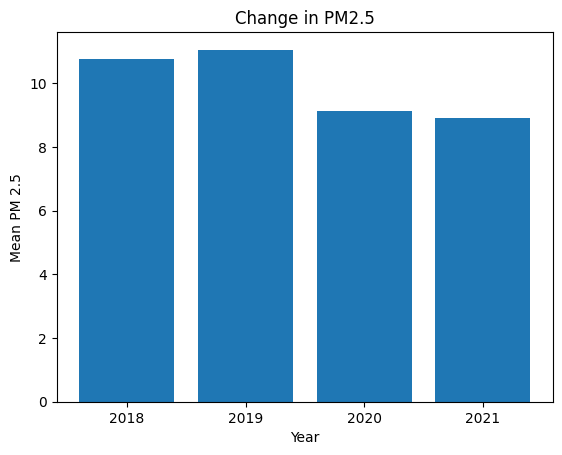

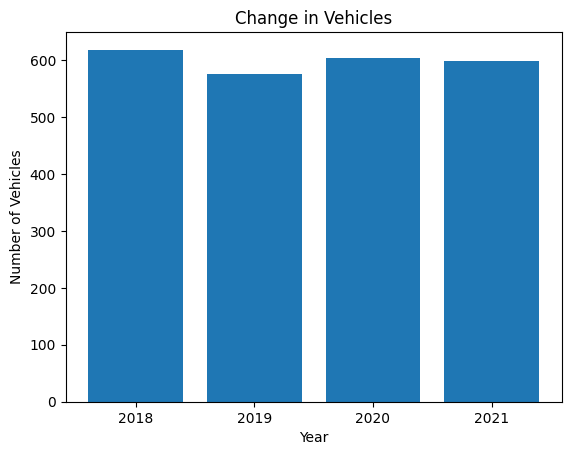

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def openCSVFile(folder,year):
    # Returns csv as dataframe
    return pd.read_csv('%s/%s.csv'%(year,folder))

def openEXCEL(year):
    # Returns excel file as dataframe
    return pd.read_excel('Vehicles.xls',sheet_name=year)
    
def getMean(df):

    # Remove white space 
    df.columns = df.columns.str.replace(' ', '')

    # calculate mean of each row and add to list
    # Done this way to avoid missing values breaking the calculations...
    i = 0
    meanVals = []
    
    for day in range(365):
        try:
            mean = pd.to_numeric(df.iloc[day,1:]).mean()
            meanVals.append(mean)
            i+=1
        except:
            continue
    
    return (sum(meanVals)/i)

def plotPM():
    boroughs = ["Camden","Bexley","Greenwich","Hillingdon","Kensington_and_Chelsea","Richmond_upon_Thames","Westminister"]
    mean2018 = []
    mean2019 = []
    mean2020 = []
    mean2021 = []
    #mean2022 = []
    
    for borough in boroughs:
        # 2018
        df = openCSVFile("2018",borough)
        mean2018.append(getMean(df))
        # 2019
        df = openCSVFile("2019",borough)
        mean2019.append(getMean(df))
        # 2020
        df = openCSVFile("2020",borough)
        mean2020.append(getMean(df))
        # 2021
        df = openCSVFile("2021",borough)
        mean2021.append(getMean(df))
        # 2022
        #df = openCSVFile("2022",borough)
        #mean2022.append(getMean(df))
        
    mean2018 = sum(mean2018)/len(mean2018)
    mean2019 = sum(mean2019)/len(mean2019)
    mean2020 = sum(mean2020)/len(mean2020)
    mean2021 = sum(mean2021)/len(mean2021)
    #mean2022 = sum(mean2022)/len(mean2022)

    # plot bar chart 
    x = ["2018","2019","2020","2021"]
    y = [mean2018,mean2019,mean2020,mean2021]
    
    plt.bar(x, y)
    

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Mean PM 2.5')
    plt.title('Change in PM2.5')

    # Show the chart
    plt.show()

def getTotal(df):
    return df['Total'].sum()
    
def vehicle():
    numberOfVehicles = []
    
    df = openEXCEL('2018')
    numberOfVehicles.append(getTotal(df))

    df = openEXCEL('2019')
    numberOfVehicles.append(getTotal(df))
    
    df = openEXCEL('2020')
    numberOfVehicles.append(getTotal(df))
    
    df = openEXCEL('2021')
    numberOfVehicles.append(getTotal(df))
    
    x = ["2018","2019","2020","2021"]
    y = [numberOfVehicles[0],numberOfVehicles[1],numberOfVehicles[2],numberOfVehicles[3]]
    
    plt.bar(x, y)
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Number of Vehicles')
    plt.title('Change in Vehicles')

    # Show the chart
    plt.show()

    
plotPM()
 
vehicle()